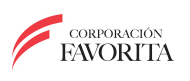


# <font color='dodgerBlue'>Corporación Favorita Grocery Sales Forecasting</font>


### Overview
Corporación Favorita, a large Ecuadorian-based grocery retailer operate hundreds of supermarkets, with over 200,000 different products on their shelves. They have challenged the Kaggle community to build a model that more accurately forecasts product sales.
We want to build a model that more accurately Forecasts Product Sales for diffirent items sold at different Favorita stores located in Ecuador. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

###  Problem Statement

Brick-and-mortar grocery stores are always in a delicate dance with purchasing and sales forecasting.
If they predict a little over, and grocers are stuck with overstocked, perishable goods and if they predict a little under, popular items quickly sell out, leaving money on the table and customers fuming.

**The task is to predict sales in the stores of an Ecuadorian supermarket chain so that they can avoid overstocking, which would reduce waste and loss, and minimize understocking, which induces opportunity cost and lower customer satisfaction.** For the sake of both the buisiness and the environment, better predictions are highly desirable. This increased efficiency could also result in higher profits for the stakeholders and/or a better pricepoint for customers, depending on the choices made by the chain. 

This problem becomes more complex and interesting as retailers add new locations with unique needs, new products, ever transitioning seasonal tastes, and unpredictable product marketing. 

Corporación Favorita, currently rely on subjective forecasting methods with very little data to back them up and very little automation to execute plans. 

This project explores how machine learning could better ensure customer satisfaction by having just enough of the right products at the right time.


### Dataset
 
The given data is a table with the following variables/features: date, store id, item id, sales volume, promotion. Whereas store id and item id are integers, promotion is a boolean and sales volume is a float (integers for discrete items, float for volume/weight). We can see the data as N time series, one per (store, item) combination. Many of these time series are most likely correlated to each other and some sort of dimensional reduction will be most welcome here.

The company also offers some other data sets, such as a list of stores with their location, a time series of daily transactions per store, a list of holidays and events, a list of products by category, and the price of oil, of which a good chunk of the ecuadorian economy is allegedly tied to. These are additional tools to simplify and/or enhance the predictions.
Corporación Favorita, has provided us with us with 3 types of data:
 
*  **Training data**, which includes the target unit_sales by date, store_nbr, and item_nbr and a unique id to label rows.
*  **Test data**, with the date, store_nbr, item_nbr combinations that are to be predicted, along with the onpromotion                  information.
*  **Supplementary data**, that may be useful in building our models. Such as: holidays_events.csv, transactions.csv, oil.csv,          items.csv, stores.csv, sample_submission.csv

For Training and Testing data we have following attributes:
*  id : This is a unique id to label rows.
*  date : 
*  store_nbr: 
*  item_nbr : 
*  unit_sales: The target unit_sales can be integer or float.Negative values represent returns of that particular item.
*  onpromotion: The onpromotion column tells whether that item_nbr was on promotion for a specified date and store_nbr.

We will be merging the Supplementary data with the Training data to create a predictive model and further analysis using following attributes:

**Additional Notes**
*  The training data does not include rows for items that had zero unit_sales for a store/date combination. There is no information as to whether or not the item was in stock for the store on the date, and teams will need to decide the best way to handle that situation. Also, there are a small number of items seen in the training data that aren't seen in the test data.
*  Wages in the public sector are paid every two weeks on the 15 th and on the last day of the month. Supermarket sales could be affected by this.
*  Pay special attention to the transferred column. A holiday that is transferred officially falls on that calendar day, but was moved to another date by the government. A transferred day is more like a normal day than a holiday. To find the day that it was actually celebrated, look for the corresponding row where type is Transfer. For example, the holiday Independencia de Guayaquil was transferred from 2012-10-09 to 2012-10-12, which means it was celebrated on 2012-10-12.
*  Days that are type Bridge are extra days that are added to a holiday (e.g., to extend the break across a long weekend). These are frequently made up by the type Work Day which is a day not normally scheduled for work (e.g., Saturday) that is meant to payback the Bridge.
*  A magnitude 7.8 earthquake struck Ecuador on April 16, 2016. People rallied in relief efforts donating water and other first need products which greatly affected supermarket sales for several weeks after the earthquake.

### Assumptions / limitations

*  We are assuming that the market and circumstances of the time period they provided the data is the same as the time period we are predicting the sales.
*  We are assuming the transportation cost are same for these two time periods.
* They have not provided any competitor data such as number of competitor stores near by which can affect the sales.
* They have mentioned if the product in a particular store is on promotion or not. Some additional information on how long the promotions are running could be useful for prediction of sales, which is not provided here.
* Ecuador is earthquake prone. Earthquake can affect the store sales, store safety stock, overall supply chain cost. Any data on natural disaster is not provided to analyze here. 

## <font color='salmon'>Import required libraries</font>

In [1]:
# Import Necessory Modules

# DATA MANIPULATION
import numpy as np # linear algebra
import random as rd # generating random numbers
import pandas as pd # data processing
import datetime # manipulating date formats
from datetime import date, timedelta
import operator # manipulating data
import gc; gc.enable() # garbage collector
from operator import add # elementwise addition
import statsmodels.formula.api as smf # formula notation (similar to R)
import scipy.stats as st # statistical tests
from scipy.stats import itemfreq
import warnings
warnings.filterwarnings("ignore")

# VIZUALIZATION
import matplotlib
import matplotlib.pyplot as plt # basic plotting
import seaborn as sns # for prettier plots
sns.set(style = 'whitegrid', color_codes = True)
%matplotlib inline

# ENSEMBLE APPROACHES
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing as pre
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from sklearn.model_selection import train_test_split


C:\Users\apara\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## <font color='salmon'>Read Datasets</font>

In [2]:
# Create input path variable
Input_Path = 'E:/AnacondaProjects/Data/Gracery Sales Forecast/'

In [3]:
%%time

# Read Train dataset (taking 15 million  random data)
n = 125497040 - 1 #number of records in file (excludes header)
s = 1568713 #desired sample size
filename = Input_Path + 'train.csv'
skip = sorted(rd.sample(range(n+1),n-s))
df_train = pd.read_csv(filename, skiprows=skip,header = None, names = ['id', 'date', 'store_nbr', 'item_nbr', 'unit_sales',
                                                                      'onpromotion'],low_memory=False) 


Wall time: 10min 8s


In [4]:
# To save time for test-runs, write the sample data to a csv file for future use
df_train.to_csv(Input_Path+"traindata.csv", index=False)

In [5]:
dtypes = {'store_nbr': np.dtype('int64'), 'item_nbr': np.dtype('int64'),
          'unit_sales': np.dtype('float64'),'onpromotion': np.dtype('O')}

# Read Train dataset
df_train=pd.read_csv(Input_Path+"traindata.csv",low_memory=False, dtype=dtypes)

# Read Test dataset
df_test = pd.read_csv(Input_Path + 'test.csv', dtype=dtypes)

# Reading the holiday and events schedule
holidays  = pd.read_csv(Input_Path + 'holidays_events.csv')

# Reading Items details
items = pd.read_csv(Input_Path + 'items.csv')

# Reading Daily oil prices
oil = pd.read_csv(Input_Path + 'oil.csv')

# Reading Stores details
stores  = pd.read_csv(Input_Path + 'stores.csv')

# Reading daily transfers per store
sales = pd.read_csv(Input_Path + 'transactions.csv')

In [6]:
print("we have taken ",len(df_train), "rows")

we have taken  1568715 rows


In [7]:
print("There are",len(items['family'].unique()),"families of products or items.")

There are 33 families of products or items.


In [8]:
print("There are",len(stores['type'].unique()),"type of stores.")

There are 5 type of stores.


In [9]:
print("Stores are in ",len(stores['city'].unique()),"cities in ", len(stores['state'].unique()),"states.")

Stores are in  22 cities in  16 states.


In [10]:
# getting various holiday type in data
print(holidays['type'].unique(), '\n')

['Holiday' 'Transfer' 'Additional' 'Bridge' 'Work Day' 'Event'] 



## <font color='salmon'>Exploratory Data Analysis</font>

### <font color='navy'> Data Pre-processing

In [11]:
#Check how many NA
print('Missing Values : ', '\n',df_train.isnull().sum())

df_train['onpromotion'] = df_train['onpromotion'].fillna(2)
df_train['onpromotion'] = df_train['onpromotion'].replace('True',1)
df_train['onpromotion'] = df_train['onpromotion'].replace('False',0)

# getting various promotion type in data
print(df_train['onpromotion'].unique(), '\n')

Missing Values :  
 id                  0
date                0
store_nbr           0
item_nbr            0
unit_sales          0
onpromotion    270632
dtype: int64
[2 0 1] 



In [12]:
df_train_nan = (df_train.isnull().sum() / df_train.shape[0]) * 100
df_train_nan

id             0.0
date           0.0
store_nbr      0.0
item_nbr       0.0
unit_sales     0.0
onpromotion    0.0
dtype: float64

** Oil Data**

We can observe some missing values in the Oil prices database.

In [13]:
#Check how many NA
print(oil.isnull().sum(), '\n')

date           0
dcoilwtico    43
dtype: int64 



We will replace the missing value with the following formula :
$$\frac{(dcoilwtico[t-1] + dcoilwtico[t+1])} {2}$$

In [14]:
#Check index to apply the formula
na_index_oil = oil[oil['dcoilwtico'].isnull() == True].index.values

#Define the index to use to apply the formala
na_index_oil_plus = na_index_oil.copy()
na_index_oil_minus = np.maximum(0, na_index_oil-1)

for i in range(len(na_index_oil)):
    k = 1
    while (na_index_oil[min(i+k,len(na_index_oil)-1)] == na_index_oil[i]+k):
        k += 1
    na_index_oil_plus[i] = min(len(oil)-1, na_index_oil_plus[i] + k )

#Apply the formula
for i in range(len(na_index_oil)):
    if (na_index_oil[i] == 0):
        oil.loc[na_index_oil[i], 'dcoilwtico'] = oil.loc[na_index_oil_plus[i], 'dcoilwtico']
    elif (na_index_oil[i] == len(oil)):
        oil.loc[na_index_oil[i], 'dcoilwtico'] = oil.loc[na_index_oil_minus[i], 'dcoilwtico']
    else:
        oil.loc[na_index_oil[i], 'dcoilwtico'] = (oil.loc[na_index_oil_plus[i], 'dcoilwtico'] + 
                                                  oil.loc[na_index_oil_minus[i], 'dcoilwtico'])/ 2    

#### Merging Suplementry data to train and test 

In [15]:
train = pd.merge(df_train, stores, on= "store_nbr")
train = pd.merge(train, items, on= "item_nbr")
train = pd.merge(train, holidays, on="date")
train = pd.merge(train, oil, on ="date")
train = pd.merge(train, sales, on =["date", "store_nbr"])
train = train.drop(['description', 'locale_name'], axis = 1)

In [16]:
# Renaming Columns
column_names = {'id' : 'ID','date' : 'Date', 'store_nbr': 'StoreNo', 'item_nbr': 'ItemNo','unit_sales': 'UnitSales',
                'onpromotion': 'OnPromotion','city': 'City','type_x': 'StoreType','cluster':  'StoreCluster',
                'family': 'ItemFamily', 'class': 'ItemClass', 'perishable': 'Perishable','type_y':'HolidayType',
                'locale': 'Locale','transferred':'Transferred', 'state': 'State','class' : 'Class',
                'dcoilwtico':'DailyOilPrice', 'transactions': 'Transactions'}

train =(train.rename(columns=column_names))

#### Tidy the train data

In [17]:
#Shape
print('Shape : ', train.shape, '\n')

#Summary
train.describe()

Shape :  (189715, 18) 



,ID,StoreNo,ItemNo,UnitSales,OnPromotion,StoreCluster,Class,Perishable,DailyOilPrice,Transactions
count,1.897150e+05,189715.000000,1.897150e+05,189715.000000,189715.000000,189715.000000,189715.000000,189715.000000,189715.000000,189715.000000
mean,6.595303e+07,27.512405,9.986439e+05,8.470445,0.276720,8.709232,1959.732615,0.253960,58.986643,1935.663743
std,3.321510e+07,16.296849,5.252874e+05,21.832802,0.630724,4.623858,1152.965091,0.435276,22.593933,1138.390450
min,3.500000e+01,1.000000,9.699500e+04,-56.000000,0.000000,1.000000,1002.000000,0.000000,27.960000,54.000000
25%,3.693256e+07,12.000000,5.596820e+05,2.000000,0.000000,4.000000,1052.000000,0.000000,44.470000,1156.000000
50%,7.000513e+07,28.000000,1.018878e+06,4.000000,0.000000,9.000000,1190.000000,0.000000,49.580000,1573.000000
75%,9.567002e+07,43.000000,1.416362e+06,9.000000,0.000000,13.000000,2708.000000,1.000000,63.130000,2475.000000
max,1.254970e+08,54.000000,2.127114e+06,2783.000000,2.000000,17.000000,7780.000000,1.000000,107.950000,8359.000000


In [18]:
#5 random lines
train.sample(5)

,ID,Date,StoreNo,ItemNo,UnitSales,OnPromotion,City,State,StoreType,StoreCluster,ItemFamily,Class,Perishable,HolidayType,Locale,Transferred,DailyOilPrice,Transactions
57439,76771176,2016-04-19,35,279125,2.0,0,Playas,Guayas,C,3,GROCERY I,1032,0,Event,National,False,40.88,833
108683,124908297,2017-08-10,18,964752,10.0,0,Quito,Pichincha,B,16,GROCERY I,1088,0,Holiday,National,True,48.54,1102
142804,38144969,2014-12-26,1,623330,1.0,0,Quito,Pichincha,D,13,GROCERY I,1033,0,Bridge,National,False,54.59,1295
141593,58721082,2015-10-09,2,1047717,11.0,0,Quito,Pichincha,D,13,BEVERAGES,1122,0,Holiday,National,False,49.67,1829
123351,78739824,2016-05-10,3,1386894,1.0,0,Quito,Pichincha,D,8,HOME AND KITCHEN II,6328,0,Event,National,False,44.68,2740


#### Let's extract only the 10 most purchased product

In [19]:
#######Get the N most purchased products########
def N_most_labels(data, variable , N , all='TRUE'):
    labels_freq_pd = itemfreq(data[variable])
    labels_freq_pd = labels_freq_pd[labels_freq_pd[:, 1].argsort()[::-1]] #[::-1] ==> to sort in descending order
    
    if all == 'FALSE':
        main_labels = labels_freq_pd[:,0][0:N]
    else: 
        main_labels = labels_freq_pd[:,0][:]
        
    labels_raw_np = data[variable].as_matrix() #transform in numpy
    labels_raw_np = labels_raw_np.reshape(labels_raw_np.shape[0],1)

    labels_filtered_index = np.where(labels_raw_np == main_labels)
    
    return labels_freq_pd, labels_filtered_index

label_freq, labels_filtered_index = N_most_labels(data = train, variable = "ItemNo", N = 10, all='FALSE')
print("labels_filtered_index[0].shape = ", labels_filtered_index[0].shape)

train_filtered = train.loc[labels_filtered_index[0],:]
print("train_filtered.shape = ", train_filtered.shape)

labels_filtered_index[0].shape =  (1369,)
train_filtered.shape =  (1369, 18)


In [20]:
label_freq[0:10]

array([[ 314384,     144],
       [1159413,     142],
       [ 215331,     141],
       [ 362548,     138],
       [ 964752,     137],
       [ 882624,     135],
       [ 162066,     134],
       [ 513855,     134],
       [ 502331,     133],
       [ 510055,     131]], dtype=int64)

In [21]:
train_filtered.sample(3)

,ID,Date,StoreNo,ItemNo,UnitSales,OnPromotion,City,State,StoreType,StoreCluster,ItemFamily,Class,Perishable,HolidayType,Locale,Transferred,DailyOilPrice,Transactions
140580,119866848,2017-06-23,36,510055,2.0,0,Libertad,Guayas,E,10,GROCERY I,1072,0,Holiday,Local,False,42.86,1012
1793,96193926,2016-11-07,19,314384,29.0,0,Guaranda,Bolivar,C,15,GROCERY I,1004,0,Holiday,Regional,False,44.88,1290
17037,70087123,2016-02-09,29,362548,2.0,0,Guayaquil,Guayas,E,10,GROCERY I,1042,0,Holiday,National,False,27.96,1071


In [22]:
#check is there is NA
null_data = train_filtered[train_filtered.isnull().any(axis=1)]

#### Reformat the date

We will extract the day, the month and the year from the 'date' variable.

In [23]:
train_filtered['Date'] = pd.to_datetime(train_filtered['Date'], format='%Y-%m-%d')

train_filtered['Month'] =train_filtered['Date'].dt.month
train_filtered['Day'] = train_filtered['Date'].dt.weekday_name
train_filtered['Year'] = train_filtered['Date'].dt.year
train_filtered['Quarter'] = train_filtered['Date'].dt.quarter
train_filtered['date'] = train_filtered['Date'].dt.day
train_filtered.drop('Date', axis=1, inplace=True)

In [24]:
train_filtered.sample(10)

,ID,StoreNo,ItemNo,UnitSales,OnPromotion,City,State,StoreType,StoreCluster,ItemFamily,...,HolidayType,Locale,Transferred,DailyOilPrice,Transactions,Month,Day,Year,Quarter,date
183501,76305646,48,162066,6.0,0,Quito,Pichincha,A,14,GROCERY I,...,Holiday,Local,False,41.450,2204,4,Thursday,2016,2,14
184914,46546384,8,964752,18.0,0,Quito,Pichincha,D,8,GROCERY I,...,Holiday,Local,False,60.720,2504,5,Tuesday,2015,2,12
164714,45253229,48,314384,62.0,0,Quito,Pichincha,A,14,GROCERY I,...,Holiday,Local,False,55.580,2399,4,Tuesday,2015,2,21
31841,101061880,9,1159413,26.0,1,Quito,Pichincha,B,6,GROCERY I,...,Additional,National,False,52.415,2712,12,Monday,2016,4,26
112479,100666548,32,314384,4.0,0,Guayaquil,Guayas,C,3,GROCERY I,...,Additional,National,False,51.440,872,12,Wednesday,2016,4,21
128912,80369861,14,513855,2.0,0,Riobamba,Chimborazo,C,7,CLEANING,...,Transfer,National,False,49.360,1131,5,Friday,2016,2,27
41145,13850229,4,362548,6.0,2,Quito,Pichincha,D,9,GROCERY I,...,Holiday,Local,False,93.120,1319,11,Tuesday,2013,4,12
74343,72152170,21,162066,9.0,0,Santo Domingo,Santo Domingo de los Tsachilas,B,6,GROCERY I,...,Holiday,Local,False,34.570,747,3,Wednesday,2016,1,2
96421,37955803,31,215331,5.0,0,Babahoyo,Los Rios,B,10,GROCERY I,...,Holiday,Local,False,55.250,2298,12,Monday,2014,4,22
109630,8719863,50,882624,4.0,2,Ambato,Tungurahua,A,14,DAIRY,...,Holiday,Local,False,107.130,2348,7,Tuesday,2013,3,23


In [25]:
#Converting the date column to date format
df_test['date']=pd.to_datetime(df_test['date'],format="%Y-%m-%d")

df_test['Month'] =df_test['date'].dt.month
df_test['Day'] = df_test['date'].dt.weekday_name
df_test['Year'] = df_test['date'].dt.year
df_test['Quarter'] = df_test['date'].dt.quarter
df_test['Date'] = df_test['date'].dt.day

df_test.drop(['date'], axis=1, inplace=True)

# Renaming Columns
column_names = {'id': 'ID','Date' : 'date', 'store_nbr': 'StoreNo', 'item_nbr': 'ItemNo','onpromotion': 'OnPromotion'}
test =(df_test.rename(columns=column_names))

test['OnPromotion'] = test['OnPromotion'].fillna(2)
test['OnPromotion'] = test['OnPromotion'].replace('True',1)
test['OnPromotion'] = test['OnPromotion'].replace('False',0)


Store-day level sale -- This variable indicates the sale of a particular store over time
Store-day level count -- This variable gives an indication of the variaty/spread of the items sold

Item-day level sale -- Sale of an item over time

Item-day level count -- This gives an indication of the popularity of the item across the supermarket chain.
This variable can lead to information like region specific items,etc

In [26]:
def aggregate_level1(df):
    
#day-store level
    sale_day_store_level=df.groupby(['Year','Month','date','StoreNo'],as_index=False)['UnitSales'].agg(['sum','count'])
    #drop index and rename
    sale_day_store_level=sale_day_store_level.reset_index().rename(columns={'sum':'StoreSales','count':'ItemVariety'})
#day-item level  
    sale_day_item_level=df.groupby(['Year','Month','date','ItemNo'],as_index=False)['UnitSales'].agg(['sum','count'])
    #drop index and rename
    sale_day_item_level=sale_day_item_level.reset_index().rename(columns={'sum':'ItemSales','count':'StoreSpread'})
#store item level   
    sale_store_item_level=df.groupby(['Year','Month','date','ItemNo'],as_index=False)['UnitSales'].agg(['sum','count'])
    #drop index and rename
    sale_store_item_level=sale_store_item_level.reset_index().rename(columns={'sum':'ItemSales','count':'Entries'})

    return sale_day_store_level,sale_day_item_level,sale_store_item_level

In [27]:
sale_day_store_level,sale_day_item_level,sale_store_item_level=aggregate_level1(train_filtered)

print(sale_day_store_level.head(), '\n')

print('\n', sale_day_item_level.head())

   Year  Month  date  StoreNo  StoreSales  ItemVariety
0  2013      2    11        3        62.0            1
1  2013      2    11       16         6.0            1
2  2013      2    11       26         4.0            1
3  2013      2    11       32         2.0            2
4  2013      2    11       54        12.0            1 


    Year  Month  date  ItemNo  ItemSales  StoreSpread
0  2013      2    11  162066        6.0            1
1  2013      2    11  215331        5.0            2
2  2013      2    11  314384       74.0            2
3  2013      2    11  513855        1.0            1
4  2013      2    12  162066       14.0            1


In [28]:
#Creating store level metrics
sale_store_level=sale_day_store_level.groupby(['StoreNo'],as_index=False)['StoreSales','ItemVariety'].agg(['sum'])

# Here the group by gives a multiindex , removing that
sale_store_level.columns = sale_store_level.columns.droplevel(1)
sale_store_level=sale_store_level.reset_index()
sale_store_level.head()

,StoreNo,StoreSales,ItemVariety
0,1,363.0,34
1,2,483.0,36
2,3,1251.0,43
3,4,336.0,31
4,5,403.0,37


In [29]:
#Creating item level metrics
sale_item_level=sale_day_item_level.groupby(['ItemNo'],as_index=False)['ItemSales'].agg(['sum'])

sale_item_level=sale_item_level.reset_index()
sale_item_level.head()

,ItemNo,sum
0,162066,984.0
1,215331,1454.0
2,314384,5858.0
3,362548,1769.0
4,502331,5252.0


## <font color='salmon'>Visualization</font>

Apart from predicting the sales, we want to ask some questions that will give some insight about the data.

1. What are the highest selling stores and store types?
2. What are the highest selling items and item group?
3. What are the locations & clusters where the store facilities are?
4. How the sales is distributed accross stores, cities storetypes etc?
5. How promotion affects sales?
6. How sales looks like over the time period? It is seasonal?
7. How perishable and non perishable sales looks like?
8. How sales is affected with respect to holidays?
9. Is there any effect of oil price with sales?
10. Which variables have high correlation with sales?

#### Top Stores by Overall Sale

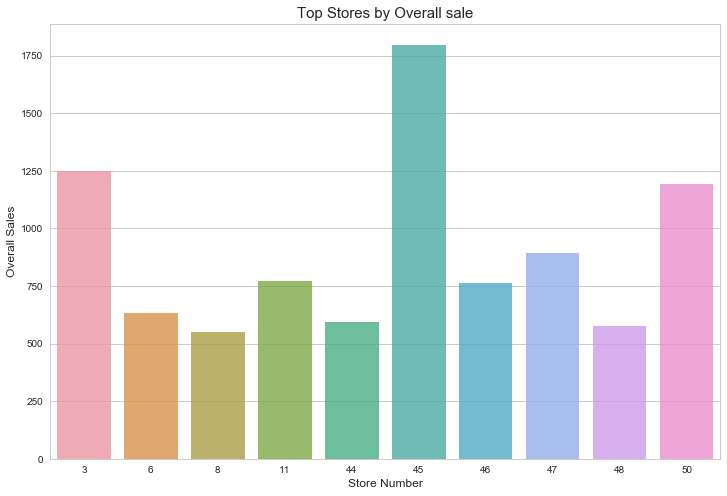

In [31]:
# Sorting by sales
temp=sale_store_level.sort_values('StoreSales',ascending=False).reset_index(drop=True)
temp=temp.set_index('StoreNo').head(10)

plt.figure(figsize=(12,8))
sns.barplot(temp.index,temp.StoreSales, alpha=0.8)
plt.ylabel('Overall Sales', fontsize=12)
plt.xlabel('Store Number', fontsize=12)
plt.title('Top Stores by Overall sale', fontsize=15)
plt.show()

#### Top Items By Overall Sale

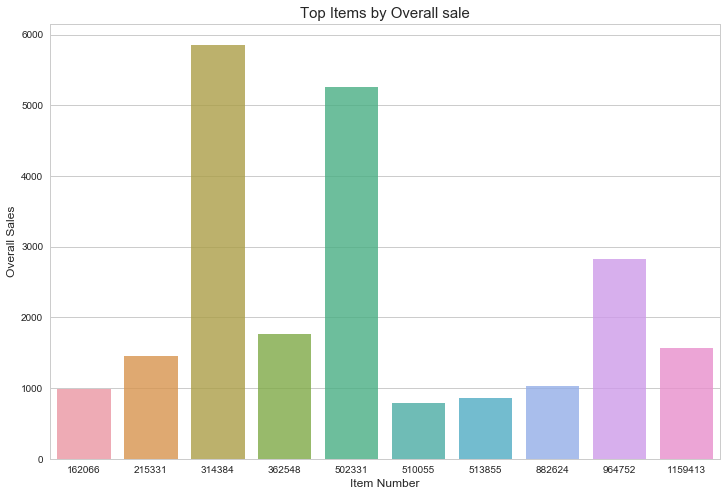

In [32]:
# Sorting by sales
temp1=sale_item_level.sort_values('sum',ascending=False).reset_index(drop=True)
temp1=temp1.set_index('ItemNo').head(10)
plt.figure(figsize=(12,8))
x=temp1.index.values
y=temp1['sum'].values
sns.barplot(x,y, alpha=0.8)
plt.ylabel('Overall Sales', fontsize=12)
plt.xlabel('Item Number', fontsize=12)
plt.title('Top Items by Overall sale', fontsize=15)
plt.show()

#### Item Family Distribution

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 33 Text xticklabel objects>)

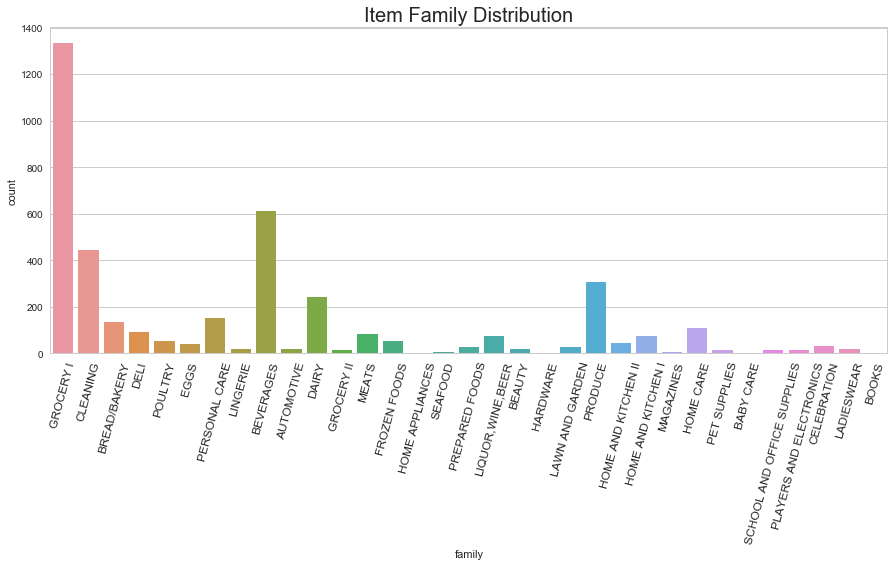

In [41]:
#Set the plot figure
plt.figure(figsize=(15,6))
# Create the plot title
plt.title('Item Family Distribution', fontsize=20)
# Plot the data
sns.countplot(data=items, x='family')
# Rotate the name of the states
plt.xticks(rotation=75, fontsize=12)

### Store distribution

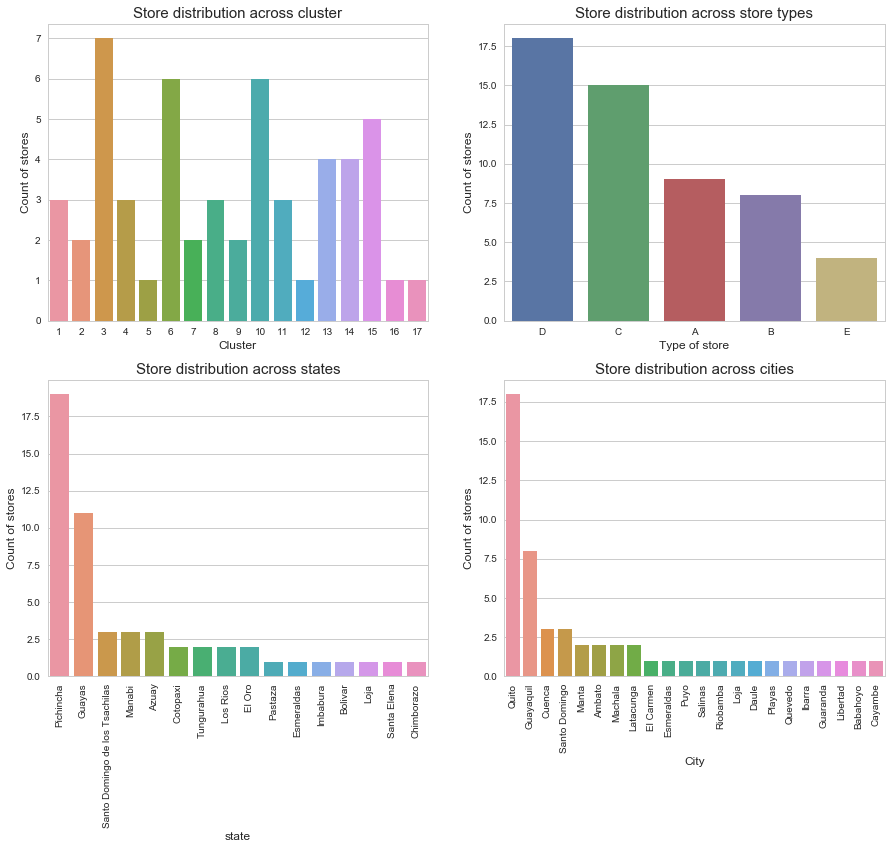

In [33]:
#Count of stores in different types and clusters
plt.figure(figsize=(15,12))
#row col plotnumber - 121
plt.subplot(221)
# Count of stores for each type 
temp = stores['cluster'].value_counts()
#plot
sns.barplot(temp.index,temp.values)
plt.ylabel('Count of stores', fontsize=12)
plt.xlabel('Cluster', fontsize=12)
plt.title('Store distribution across cluster', fontsize=15)

plt.subplot(222)
# Count of stores for each type 
temp = stores['type'].value_counts()
#plot
sns.barplot(temp.index,temp.values)
plt.ylabel('Count of stores', fontsize=12)
plt.xlabel('Type of store', fontsize=12)
plt.title('Store distribution across store types', fontsize=15)

plt.subplot(223)
# Count of stores for each type 
temp = stores['state'].value_counts()
#plot
sns.barplot(temp.index,temp.values)
plt.ylabel('Count of stores', fontsize=12)
plt.xlabel('state', fontsize=12)
plt.title('Store distribution across states', fontsize=15)
plt.xticks(rotation='vertical')

plt.subplot(224)
# Count of stores for each type 
temp = stores['city'].value_counts()
#plot
sns.barplot(temp.index,temp.values)
plt.ylabel('Count of stores', fontsize=12)
plt.xlabel('City', fontsize=12)
plt.title('Store distribution across cities', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

### Sales Distribution

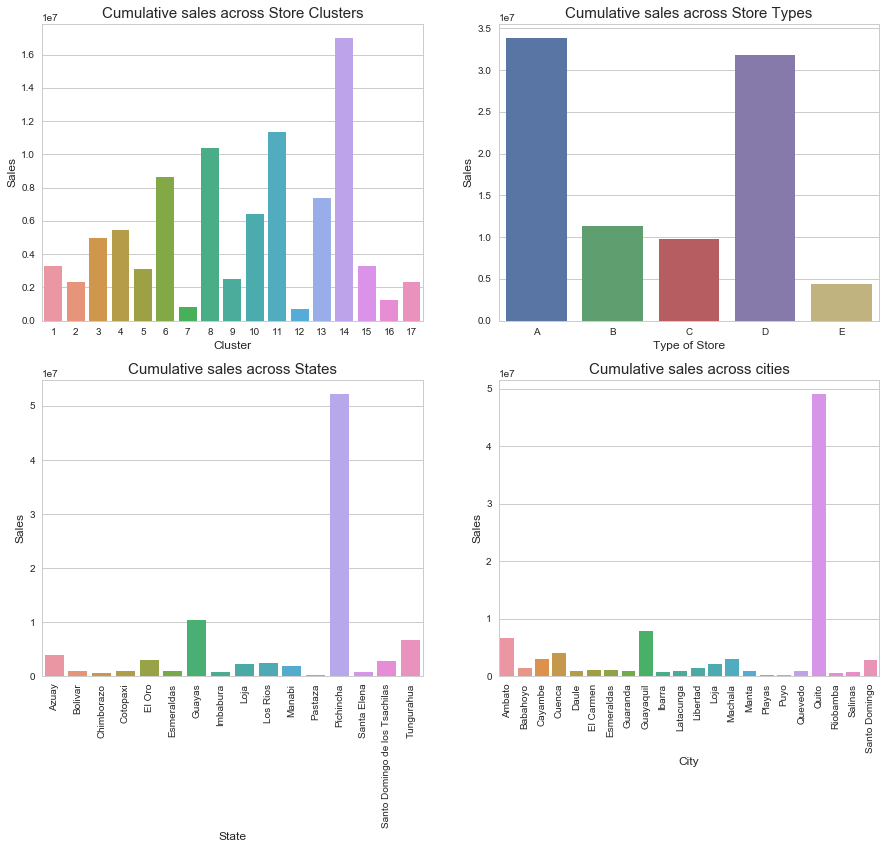

In [34]:
sale_store_level=sale_store_level.iloc[:,0:2]
#print(sale_store_level)
merge=pd.merge(sale_store_level,train,how='left',on='StoreNo')
#temp

#Sale of stores in different types and clusters
plt.figure(figsize=(15,12))
#row col plotnumber - 121
plt.subplot(221)
# Sale of stores for each type 
temp = merge.groupby(['StoreCluster'])['StoreSales'].sum()
#plot
sns.barplot(temp.index,temp.values)
plt.ylabel('Sales', fontsize=12)
plt.xlabel('Cluster', fontsize=12)
plt.title('Cumulative sales across Store Clusters', fontsize=15)

plt.subplot(222)
# sale of stores for each type 
temp = merge.groupby(['StoreType'])['StoreSales'].sum()
#plot
sns.barplot(temp.index,temp.values)
plt.ylabel('Sales', fontsize=12)
plt.xlabel('Type of Store', fontsize=12)
plt.title('Cumulative sales across Store Types', fontsize=15)

plt.subplot(223)
# sale of stores for each type 
temp = merge.groupby(['State'])['StoreSales'].sum()
#plot
sns.barplot(temp.index,temp.values)
plt.ylabel('Sales', fontsize=12)
plt.xlabel('State', fontsize=12)
plt.title('Cumulative sales across States', fontsize=15)
plt.xticks(rotation='vertical')

plt.subplot(224)
# sale of stores for city
temp = merge.groupby(['City'])['StoreSales'].sum()
#plot
sns.barplot(temp.index,temp.values)
plt.ylabel('Sales', fontsize=12)
plt.xlabel('City', fontsize=12)
plt.title('Cumulative sales across cities', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

Interesting fact here is that store cluster number 14 which has only 4 stores has the most sales.

### Sale variation

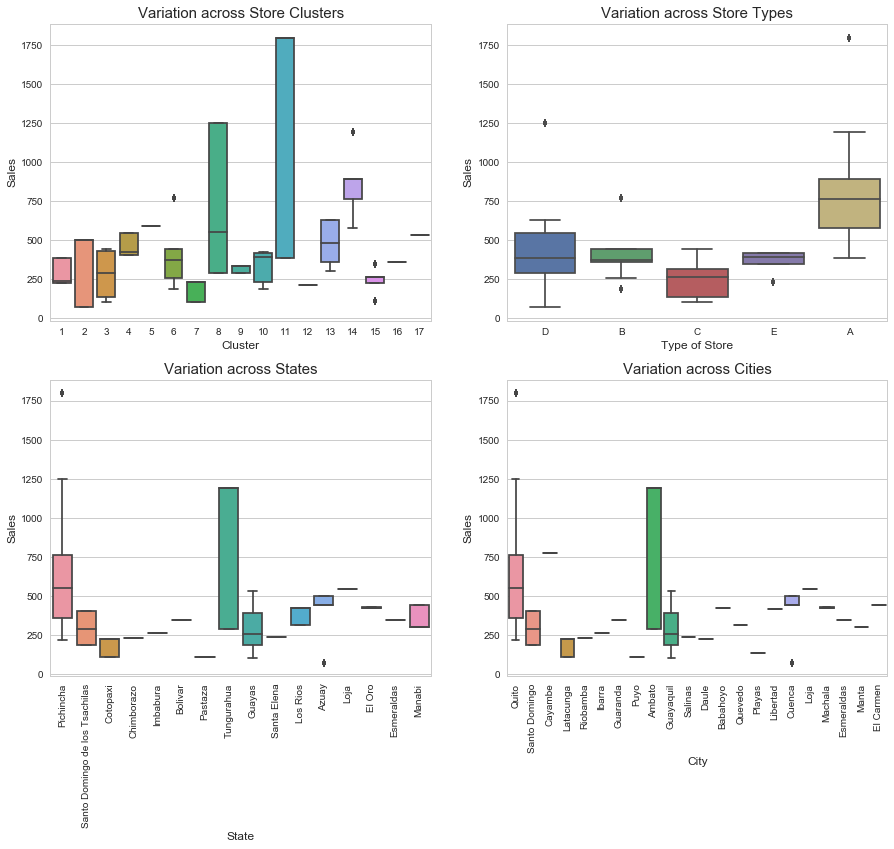

In [35]:
sale_store_level=sale_store_level.iloc[:,0:2]
merge=pd.merge(sale_store_level,train,how='left',on='StoreNo')

plt.figure(figsize=(15,12))
#row col plotnumber - 121
plt.subplot(221)
#plot
sns.boxplot(x='StoreCluster', y="StoreSales", data=merge)
plt.ylabel('Sales', fontsize=12)
plt.xlabel('Cluster', fontsize=12)
plt.title('Variation across Store Clusters', fontsize=15)

plt.subplot(222)
# sale of stores for each type 
sns.boxplot(x='StoreType', y="StoreSales", data=merge)
plt.ylabel('Sales', fontsize=12)
plt.xlabel('Type of Store', fontsize=12)
plt.title('Variation across Store Types', fontsize=15)

plt.subplot(223)
# sale of stores for each type 
sns.boxplot(x='State', y="StoreSales", data=merge)
plt.ylabel('Sales', fontsize=12)
plt.xlabel('State', fontsize=12)
plt.title('Variation across States', fontsize=15)
plt.xticks(rotation='vertical')

plt.subplot(224)
# sale of stores for city
sns.boxplot(x='City', y="StoreSales", data=merge)
plt.ylabel('Sales', fontsize=12)
plt.xlabel('City', fontsize=12)
plt.title('Variation across Cities', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

There are a lot of cases where there is only one store that is present in that specific grouping. Hence the single lines in the boxplot above

* Clusters 5,16,17,12 have only one store
* 8 states have only one store
* 15 cities have only one store

In [36]:
store_items=pd.merge(sale_store_item_level,train,on='ItemNo')

#item
# top selling items by store type
top_items_by_type=store_items.groupby(['StoreType','ItemNo'])['ItemSales'].sum()
top_items_by_type=top_items_by_type.reset_index().sort_values(['StoreType','ItemSales'],ascending=[True,False])

#get top 5
top_items_by_type=top_items_by_type.groupby(['StoreType']).head(5)


#class
# top selling item class by store type
top_class_by_type=store_items.groupby(['StoreType','Class'])['ItemSales'].sum()
top_class_by_type=top_class_by_type.reset_index().sort_values(['StoreType','ItemSales'],ascending=[True,False])

#get top 5
top_class_by_type=top_class_by_type.groupby(['StoreType']).head(5)


#family
# top selling item family by store type
top_family_by_type=store_items.groupby(['StoreType','ItemFamily'])['ItemSales'].sum()
top_family_by_type=top_family_by_type.reset_index().sort_values(['StoreType','ItemSales'],ascending=[True,False])

#get top 5
top_family_by_type=top_family_by_type.groupby(['StoreType']).head(5)

#### Top 5 Item Family across Store Types

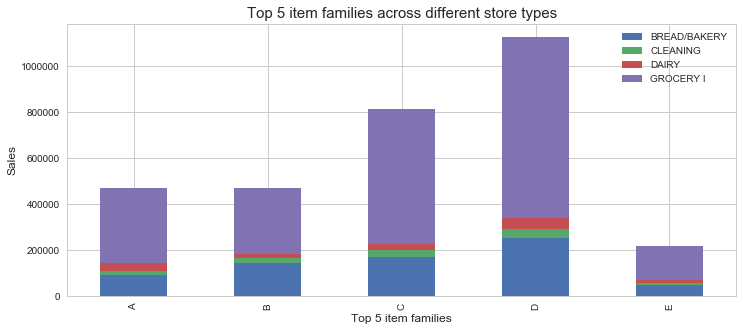

In [37]:
plt.figure(figsize=(12,5))

x=top_family_by_type.pivot(index='StoreType',columns='ItemFamily')
x.plot.bar(stacked=True,figsize=(12,5))
y=x.columns.droplevel(0).values
#print(y)
plt.ylabel('Sales', fontsize=12)
plt.xlabel('Top 5 item families', fontsize=12)
plt.title('Top 5 item families across different store types', fontsize=15)
plt.xticks(rotation='vertical')
plt.legend(y)
plt.show()

#### Top 5 Item Class across Store Types

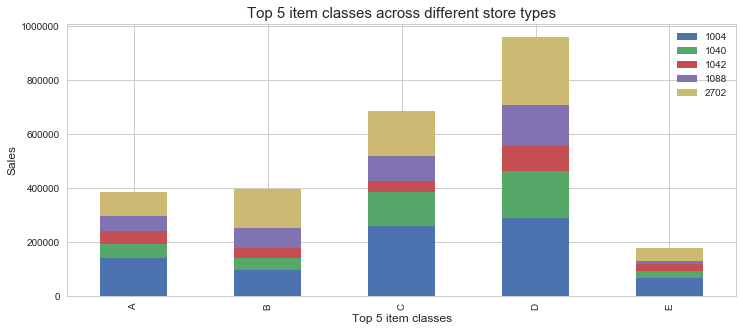

In [38]:
plt.figure(figsize=(12,5))
x=top_class_by_type.pivot(index='StoreType',columns='Class')
x.plot.bar(stacked=True,figsize=(12,5))
y=x.columns.droplevel(0).values
#print(y)
plt.ylabel('Sales', fontsize=12)
plt.xlabel('Top 5 item classes', fontsize=12)
plt.title('Top 5 item classes across different store types', fontsize=15)
plt.xticks(rotation='vertical')
plt.legend(y)
plt.show()

#### Top 5 Items across Store Types

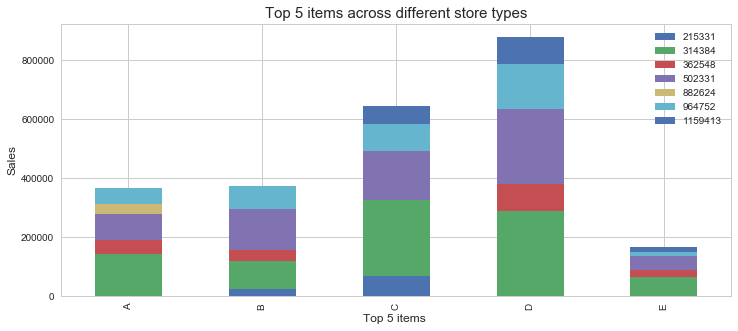

In [39]:
plt.figure(figsize=(12,5))
x=top_items_by_type.pivot(index='StoreType',columns='ItemNo')
x.plot.bar(stacked=True,figsize=(12,5))
y=x.columns.droplevel(0).values
#print(y)
plt.ylabel('Sales', fontsize=12)
plt.xlabel('Top 5 items ', fontsize=12)
plt.title('Top 5 items across different store types', fontsize=15)
plt.xticks(rotation='vertical')
plt.legend(y)
plt.show()

### Plotting Sales with date

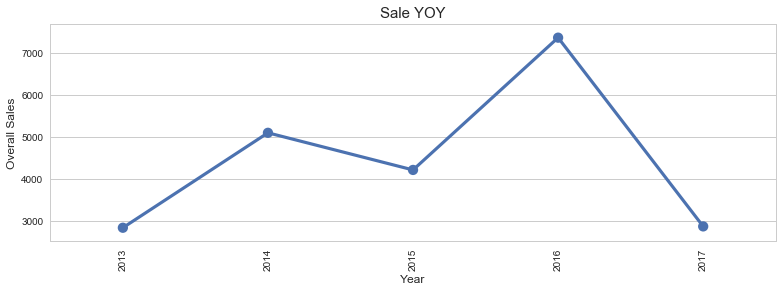

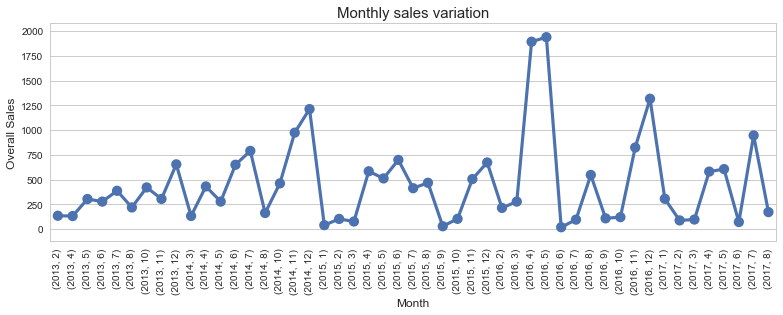

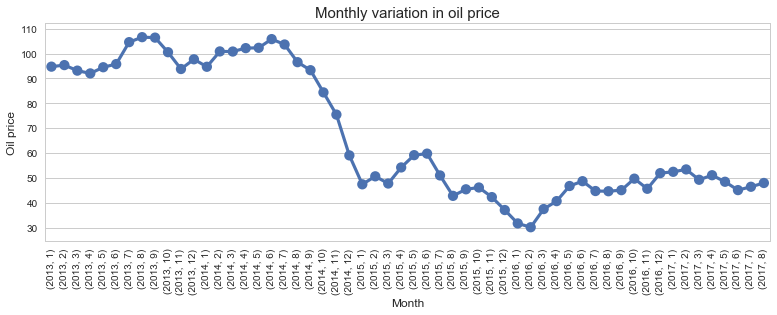

In [40]:
#Overall sales
#YOY sales
temp=sale_day_store_level.groupby('Year')['StoreSales'].sum()
plt.figure(figsize=(13,4))
sns.pointplot(temp.index,temp.values, alpha=0.8)
plt.ylabel('Overall Sales', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.title('Sale YOY', fontsize=15)
plt.xticks(rotation='vertical')

# month over month sales
temp=sale_day_store_level.groupby(['Year','Month'])['StoreSales'].sum()
plt.figure(figsize=(13,4))
sns.pointplot(temp.index,temp.values, alpha=0.8)
plt.ylabel('Overall Sales', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.title('Monthly sales variation', fontsize=15)
plt.xticks(rotation='vertical')

# also checking the oil price change
oil['date']=pd.to_datetime(oil['date'])
oil['Year']=oil['date'].dt.year
oil['Month']=oil['date'].dt.month 

# Oil price variation over month
temp=oil.groupby(['Year','Month']).agg(['sum','count'])
temp.columns = temp.columns.droplevel(0)
temp['avg']=temp['sum']/temp['count']
#plot
plt.figure(figsize=(13,4))
sns.pointplot(temp.index,temp.avg, alpha=0.8)
plt.ylabel('Oil price', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.title('Monthly variation in oil price', fontsize=15)
plt.xticks(rotation='vertical')

plt.show()
plt.show()

#### Holiday Type Count

Text(0,0.5,'# of Holiday Events')

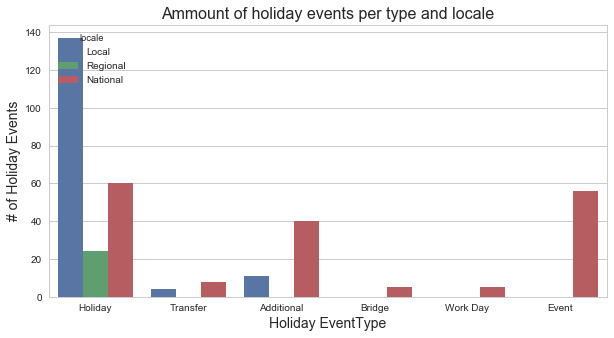

In [42]:
# Set the plot size
plt.figure(figsize=(10,5))

# Create the barplot
sns.countplot(data=holidays, x='type', hue='locale')

# Set the plot title
plt.title('Ammount of holiday events per type and locale', fontsize=16)

# Set the axes labels
plt.xlabel('Holiday EventType', fontsize=14)
plt.ylabel('# of Holiday Events', fontsize=14)

#### Unit Sales with respect to Date and Promotion variable

Text(0,0.5,'Unit Sales')

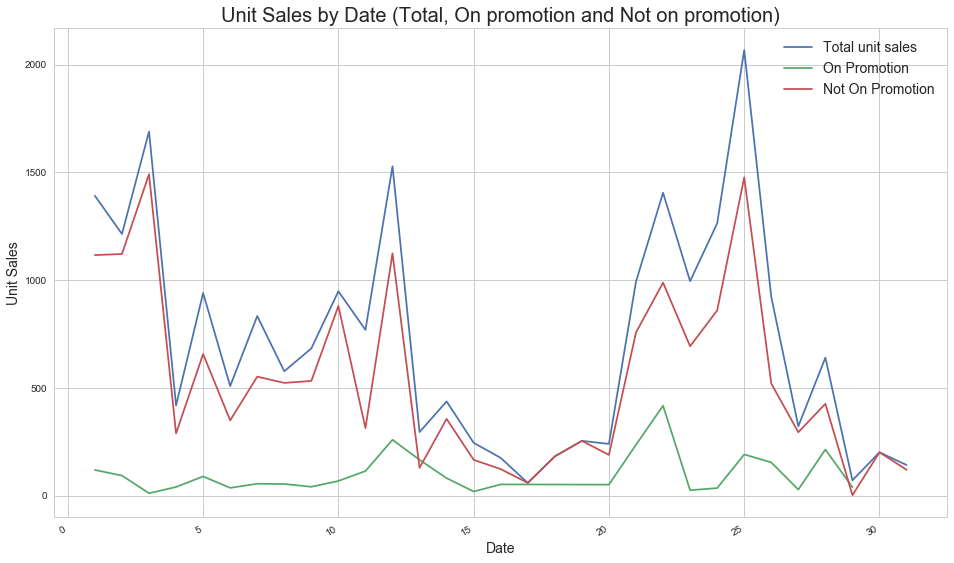

In [43]:
df_plot = train_filtered.groupby(by=['date']).agg({'UnitSales':'sum'}).reset_index()

# Unit Sales by Date
fig, ax = plt.subplots(1)
fig.autofmt_xdate()
#Set the plot figure
fig.set_figheight(10)
fig.set_figwidth(16)
# Create the plot title
plt.title('Unit Sales by Date & Promotion', fontsize=20)
# Plot total unit sales
plt.plot(df_plot.date, df_plot.UnitSales)

# plot unit sales on promotion
df_plot = train_filtered.loc[train_filtered['OnPromotion'] == 1].groupby(by=['date']).agg({'UnitSales':'sum'}).reset_index()
plt.plot(df_plot.date, df_plot.UnitSales)

# plot unit sales not on promotion
df_plot = train_filtered.loc[train_filtered['OnPromotion'] == 0].groupby(by=['date']).agg({'UnitSales':'sum'}).reset_index()
plt.plot(df_plot.date, df_plot.UnitSales)

# Set the legend
plt.legend(['Total unit sales','On Promotion','Not On Promotion'], fontsize=14)

# Set the labels
plt.xlabel('Date',fontsize=14)
plt.ylabel('Unit Sales',fontsize=14)

#### Unit Sales by Item family and Perishable varibale

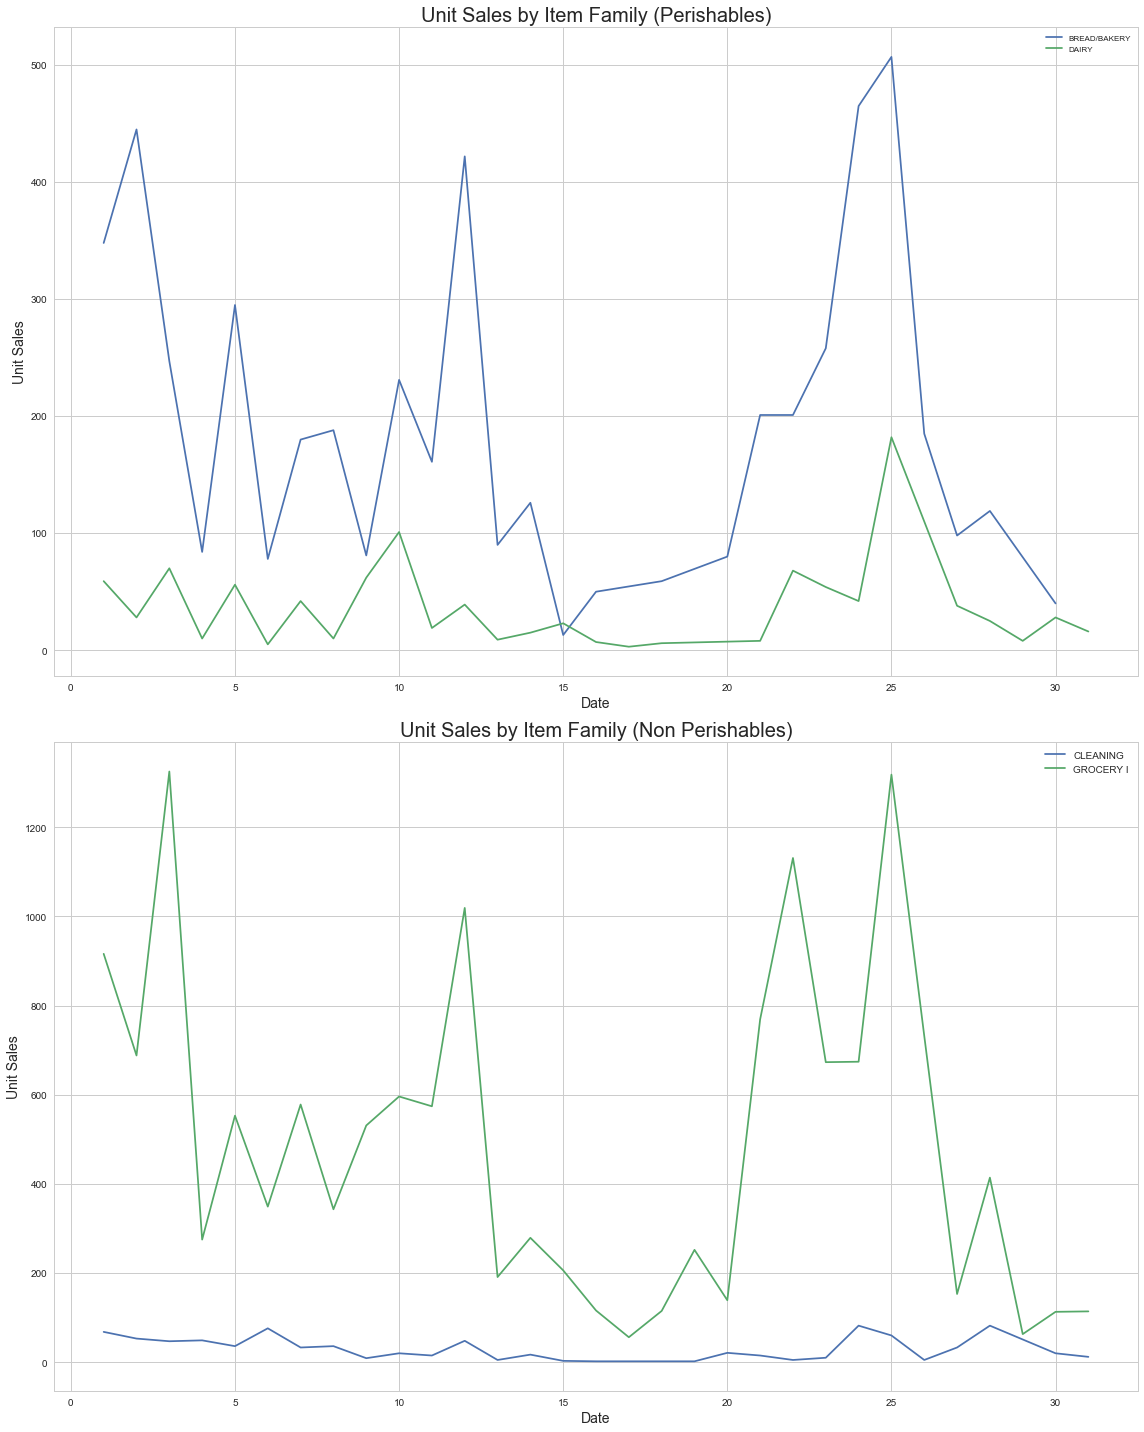

In [44]:
df_plot = train_filtered.groupby(by=['date','ItemFamily','Perishable']).agg({'UnitSales':'sum'}).reset_index()

# Unit Sales by Date
fig, ax = plt.subplots(1)
fig.autofmt_xdate()
#Set the plot figure
fig.set_figheight(20)
fig.set_figwidth(16)

# Set the first subplot
plt.subplot(2,1,1)

# Create the plot title
plt.title('Unit Sales by Item Family (Perishables)', fontsize=20)

# Get each item family.
families = df_plot.loc[df_plot['Perishable'] == True].ItemFamily.unique()

# For each family
for family in families:
    
    # Filter the dataframe by the family
    df_curr_plot = df_plot.loc[(df_plot['ItemFamily'] == family)]
    
    # Plot unit sales of the current item family
    plt.plot(df_curr_plot.date, df_curr_plot.UnitSales, label=family)

# Set the legends
plt.legend(families, fontsize=8)

# Set the labels
plt.xlabel('Date',fontsize=14)
plt.ylabel('Unit Sales',fontsize=14)

# Set the second subplot
plt.subplot(2,1,2)

# Create the plot title
plt.title('Unit Sales by Item Family (Non Perishables)', fontsize=20)

# Get each item family.
families = df_plot.loc[df_plot['Perishable'] == False].ItemFamily.unique()

# For each family
for family in families:
    
    # Filter the dataframe by the family
    df_curr_plot = df_plot.loc[(df_plot['ItemFamily'] == family)]
    
    # Plot unit sales of the current item family
    plt.plot(df_curr_plot.date, df_curr_plot.UnitSales, label=family)

# Set the legends
plt.legend(fontsize=10)#, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Set the labels
plt.xlabel('Date',fontsize=14)
plt.ylabel('Unit Sales',fontsize=14)

plt.tight_layout()

In the next figure we can verify how the observed seasonality affects the sales throughout the week. Here is very clear that:

Saturday and Sunday are the most important days for the major part of the stores.
Two questions that we need to answer now are:

Why is Thursday the less significant day for sales for almost all stores?
What do the stores with big sales on the beginning of the week (Mon, Tue, Wed) have in common?

#### Seasonality By Week-day

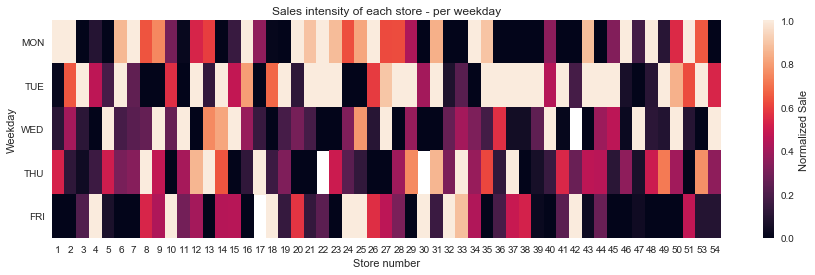

In [45]:
df_stores_weekday = train_filtered.groupby(['StoreNo', 'Day']).sum().reset_index()
df_stores_weekday = df_stores_weekday.pivot(index='Day', columns='StoreNo', values='UnitSales')

plt.figure(figsize=(15,4))
ax = sns.heatmap(df_stores_weekday.apply(lambda col: (col-min(col))/(max(col)-min(col)), axis=0),
                 cbar_kws={'label': 'Normalized Sale'})
ax.set_ylabel('Weekday')
ax.set_xlabel('Store number')
ax.set_yticklabels(['MON', 'TUE', 'WED', 'THU', 'FRI', 'SAT', 'SUN'])
ax.set_title('Sales intensity of each store - per weekday')
plt.yticks(rotation=0)
plt.show()

#### Correlation Matrix

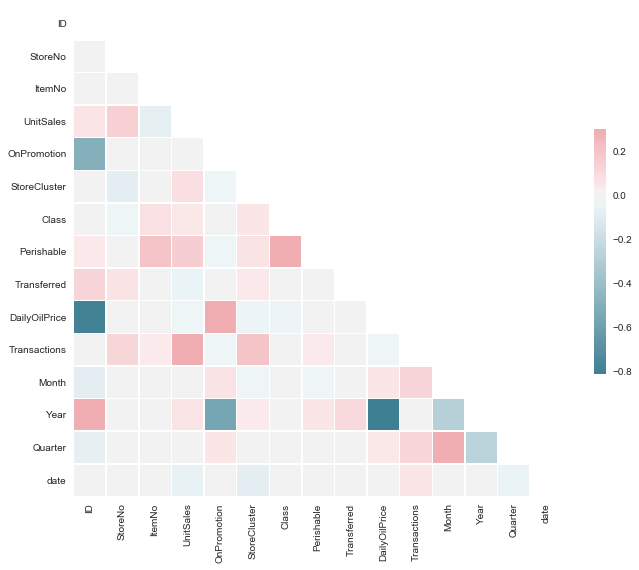

In [46]:
# Compute the correlation matrix
corr = train_filtered.corr()

#print(corr)

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))


# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5,
            cbar_kws={"shrink": .5},xticklabels=corr.columns.values,yticklabels=corr.columns.values)

#### Insight from Visualization:

1. store type A is highest selling with stores 45 being the highest selling store.
2. Grocery is the highest selling item type.
3. Capital of Ecuador has the highest number of store facilities.
4. There are a lot of cases where there is only one store that is present in that specific grouping.Clusters 5,16,17,12 have only one store, 15 cities in 8 sates have only one store
5. Effect of promotion not very clear - We have done t-test later to find out.
6. We see a seasonal pattern of sales over time - Need to perform some time series analysis.
7. PErishable and non perishable item sales don't look much different - validated later on regression.
8. Our sample had all weekdays, so further analysis has been done in regression to see if holidays have any effect on sales. 
9. Oil price does not seem to have much effect on sales- verification done in regression analysis later.
10. Sales has maximum correlation with transaction and some with class.

## <font color='salmon'> Statistical Test for Correlation </font>

### <font color='navy'> Chi-squared Test</font>

#### <font color='firebrick'> Class and UnitSales</font>
 
* Null Hypothesis H0        = Class and UnitSales are independent from each other.
* Alternative Hypothesis HA = Class and UnitSales are not independent of each other. There is a relationship between them.

Now, to determine if there is a statistically significant correlation between the variables, 
we use a chi-square test of independence of variables in a contingency table

Here, we create a contingency table, with the frequencies of all possible values

In [47]:
# Contingency table
contingency1  = pd.crosstab(train_filtered['Class'], train_filtered['UnitSales'])
contingency1 

UnitSales,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,113.0,115.0,119.0,122.0,135.0,140.0,146.0,158.0,162.0,165.0
Class,,,,,,,,,,,,,,,,,,,,,
1004,0,0,0,3,0,2,2,5,2,3,...,0,1,1,1,1,0,1,1,2,0
1040,11,23,26,19,25,22,13,9,14,10,...,0,0,0,0,0,0,0,0,0,0
1042,9,14,5,10,10,12,11,8,6,4,...,0,0,0,0,0,0,0,0,0,0
1048,16,11,18,14,10,9,10,6,3,6,...,0,0,0,0,0,0,0,0,0,0
1072,17,24,16,19,11,7,6,7,7,1,...,0,0,0,0,0,0,0,0,0,0
1088,11,5,7,5,5,4,7,5,3,6,...,1,0,0,0,0,0,0,0,0,2
2116,15,17,16,12,11,14,4,4,6,3,...,0,0,0,0,0,0,0,0,0,0
2702,0,0,0,1,1,0,0,1,1,0,...,0,0,0,0,0,1,0,0,0,0
3034,23,17,16,14,9,12,7,5,1,5,...,0,0,0,0,0,0,0,0,0,0


Finally, we compute the chi-square test statistic and the associated p-value. The null hypothesis is the independence between the variables. SciPy implements this test in scipy.stats.chi2_contingency, which returns several objects. We're interested in the second result, which is the p-value.

In [48]:
# Chi-square test of independence.
c, p, dof, expected = st.chi2_contingency(contingency1)

print('Score :', c)
print('\n Pvalue :', p)
print('\n DOF :', dof)
print('\n Expected : \n', expected)

Score : 1420.68013888

 Pvalue : 2.21252873717e-39

 DOF : 784

 Expected : 
 [[ 10.72899927  11.67567568  10.9393718   10.20306793   8.62527392
    8.62527392   6.31117604   5.25931337   4.5230095    3.99707816
    4.5230095    4.31263696   3.78670562   3.15558802   3.15558802
    3.05040175   1.78816654   1.68298028   1.57779401   2.62965668
    1.57779401   0.94667641   1.15704894   1.57779401   0.84149014
    1.36742148   0.84149014   1.36742148   0.94667641   0.84149014
    1.26223521   0.6311176    0.94667641   0.94667641   1.05186267
    0.6311176    0.3155588    0.10518627   1.05186267   0.73630387
    0.3155588    0.52593134   0.52593134   0.42074507   0.3155588
    0.3155588    0.3155588    0.42074507   0.3155588    0.42074507
    0.42074507   0.42074507   0.6311176    0.21037253   0.73630387
    0.10518627   0.3155588    0.52593134   0.10518627   0.10518627
    0.21037253   0.21037253   0.3155588    0.21037253   0.42074507
    0.10518627   0.6311176    0.10518627   0.1051862

####  Interpretation of Result:

* The p-value is much lower than 0.05.
* There is strong evidence that the null hypothesis is False.
* We reject the null hypothesis and conclude that there is a statistically significant correlation between the class and unit Sales.

#### <font color='firebrick'> Transactions and UnitSales</font>
 
* Null Hypothesis H0        = Transactions and UnitSales are independent from each other.
* Alternative Hypothesis HA = Transactions and UnitSales are not independent of each other. There is a relationship between them.

Now, to determine if there is a statistically significant correlation between the variables, 
we use a chi-square test of independence of variables in a contingency table

Here, we create a contingency table, with the frequencies of all possible values:

In [49]:
# Contingency table
contingency2  = pd.crosstab(train_filtered['Transactions'], train_filtered['UnitSales'])
contingency2

UnitSales,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,113.0,115.0,119.0,122.0,135.0,140.0,146.0,158.0,162.0,165.0
Transactions,,,,,,,,,,,,,,,,,,,,,
415,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
423,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
468,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
471,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
477,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
486,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
492,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
500,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
520,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
# Chi-square test of independence.
c, p, dof, expected = st.chi2_contingency(contingency2)

print('Score :', c)
print('\n Pvalue :', p)
print('\n DOF :', dof)
print('\n Expected : \n', expected)

Score : 110227.504689

 Pvalue : 0.0

 DOF : 91238

 Expected : 
 [[ 0.07450694  0.08108108  0.07596786 ...,  0.00073046  0.00146092
   0.00146092]
 [ 0.07450694  0.08108108  0.07596786 ...,  0.00073046  0.00146092
   0.00146092]
 [ 0.07450694  0.08108108  0.07596786 ...,  0.00073046  0.00146092
   0.00146092]
 ..., 
 [ 0.07450694  0.08108108  0.07596786 ...,  0.00073046  0.00146092
   0.00146092]
 [ 0.07450694  0.08108108  0.07596786 ...,  0.00073046  0.00146092
   0.00146092]
 [ 0.07450694  0.08108108  0.07596786 ...,  0.00073046  0.00146092
   0.00146092]]


####  Interpretation of Result:

* The p-value is less than 0.05.
* There is evidence that the null hypothesis is false, so reject Null Hypothesis.
* We can continue with the alternate hypothesis and conclude that there is statistically significant relationship between Sales and transaction.

### <font color='navy'> T-Test</font>

#### <font color='firebrick'> Promotion and Sales of the stores</font>

The two-sample t-test is used to determine if two population means are equal. 

* Null Hypothesis H0        = Promotion and Sales are independent from each other.
* Alternative Hypothesis HA = Promotion and Sales are not independent of each other. There is a relationship between them.


* Promotion - categorical variable - Independent variable
* Sales - continuous variable - Dependent variable

Now, to determine if there is a statistically significant correlation between the variables, 
we use a student t test

2-sample t-test: testing for difference across populations

In [51]:
#contingency1  = pd.crosstab(train_filtered['Class'], train_filtered['UnitSales'])
promo_sales = train[train['OnPromotion'] == 1.0]['UnitSales']
nopromo_sales = train[train['OnPromotion'] == 0.0]['UnitSales']
st.ttest_ind(promo_sales, nopromo_sales, equal_var = False)

Ttest_indResult(statistic=19.992176859477979, pvalue=7.2922888803762834e-88)

P value is less than 0.05. so, Sales has relationship with promotion.

## <font color='salmon'> Correlation / Regression</font>

#### <font color='navy'> Question - What are the Potential predictors for UnitSales?</font>

##### We will do Linear Regression for this prediction

In [88]:
lm0 = smf.ols(formula = 'np.log(UnitSales) ~ Transactions + Class + StoreType + Day + date + Year + Month + StoreNo + ItemNo + ItemFamily + StoreCluster + Locale + City + OnPromotion', 
              data = train_filtered).fit()

#print the Result 
print(lm0.summary())

                            OLS Regression Results                            
Dep. Variable:      np.log(UnitSales)   R-squared:                       0.453
Model:                            OLS   Adj. R-squared:                  0.435
Method:                 Least Squares   F-statistic:                     25.49
Date:                Tue, 12 Dec 2017   Prob (F-statistic):          2.72e-142
Time:                        23:05:51   Log-Likelihood:                -1735.0
No. Observations:                1369   AIC:                             3558.
Df Residuals:                    1325   BIC:                             3788.
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

Here we see that there is No relation between oil price on sales.

Transactions, Class, StoreType, Day, date, Year, Month, StoreNo, ItemNo, ItemFamily, StoreCluster, Locale, City, OnPromotion are **Potential Predictor** for Unit Sales.

## <font color='salmon'> Predictive Modelling

In [53]:
dummy_variables = ['City','StoreType','StoreCluster','ItemFamily','Perishable','HolidayType',
                   'Locale', 'Transferred', 'Day']

for var in dummy_variables:
    dummy = pd.get_dummies(train_filtered[var], prefix = var, drop_first = False)
    train_data = pd.concat([train_filtered, dummy], axis = 1)

train_data = train_data.drop(dummy_variables, axis = 1)
train_data = train_data.drop(['State','Quarter'], axis = 1)

print('Shape : ', train_data.shape)

Shape :  (1369, 16)


In [54]:
#Re-scale
#We keep this value to re-scale the predicted unit_sales values in the following lines of code.
min_train, max_train = train_data['UnitSales'].min(), train_data['UnitSales'].max()

scalable_variables = ['UnitSales','DailyOilPrice']

for var in scalable_variables:
    mini, maxi = train_data[var].min(), train_data[var].max()
    train_data.loc[:,var] = (train_data[var] - mini) / (maxi - mini)

print('Shape : ', train_data.shape)

Shape :  (1369, 16)


In [55]:
train_data.head()

,ID,StoreNo,ItemNo,UnitSales,OnPromotion,Class,DailyOilPrice,Transactions,Month,Year,date,Day_Friday,Day_Monday,Day_Thursday,Day_Tuesday,Day_Wednesday
89,77073586,45,502331,0.207317,0,2702,0.185023,3570,4,2016,22,1,0,0,0,0
120,77087996,51,502331,0.341463,0,2702,0.185023,1842,4,2016,22,1,0,0,0,0
257,77007923,5,513855,0.012195,0,3034,0.185023,1111,4,2016,22,1,0,0,0,0
457,77054393,34,502331,0.439024,1,2702,0.185023,2202,4,2016,22,1,0,0,0,0
458,77054110,34,162066,0.085366,0,1048,0.185023,2202,4,2016,22,1,0,0,0,0


### <font color='firebrick'> KNN Forecasting

In [72]:
null_data = train_data[train_data.isnull().any(axis=1)]
null_data = test[test.isnull().any(axis=1)]

In [80]:
#train database without unit_sales
train_data = train_data.reset_index(drop=True)  #we reset the index
yk_labels = train_data[['UnitSales']]
xk_train_data = train_data.drop(['UnitSales'], axis = 1)

xk_train, xk_valid, yk_train, yk_valid = train_test_split(xk_train_data, yk_labels,test_size = 0.2,random_state=10)

In [83]:
scaler = pre.StandardScaler().fit(xk_train)
xk_train_scaled = scaler.transform(xk_train)
xk_valid_scaled = scaler.transform(xk_valid)

In [84]:
neigh = KNeighborsRegressor(n_neighbors=100, n_jobs=-1,leaf_size=100,weights='distance')
neigh.fit(xk_train_scaled,yk_train)

KNeighborsRegressor(algorithm='auto', leaf_size=100, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=100, p=2,
          weights='distance')

In [86]:
sales_pred=neigh.predict(xk_valid)

In [87]:
neigh.score(xk_valid,sales_pred)

1.0

### <font color='firebrick'> Random Forest - Sales Forecasting

In [56]:
#train database without unit_sales
train_data = train_data.reset_index(drop=True)  #we reset the index
y_labels = train_data['UnitSales']
X_train_data = train_data.drop(['UnitSales'], axis = 1)

print('Shape X :', X_train_data.shape)
print('Shape y :', y_labels.shape)

Shape X : (1369, 15)
Shape y : (1369,)


In [57]:
num_test = 0.20
X_train, X_validation, y_train, y_validation = train_test_split(X_train_data, y_labels, test_size=num_test, random_state=15)
print('X_train shape :', X_train.shape)
print('y_train shape :', y_train.shape)
print('X_validation shape :', X_validation.shape)
print('y_validation shape :', y_validation.shape)

X_train shape : (1095, 15)
y_train shape : (1095,)
X_validation shape : (274, 15)
y_validation shape : (274,)


In [58]:
# Choose the type of classifier. 
RFR = RandomForestRegressor()

# Choose some parameter combinations to try
#YOU CAN TRY DIFFERENTS PARAMETERS TO FIND THE BEST MODEL
parameters = {'n_estimators': [5, 10, 100],
              #'criterion': ['mse'],
              #'max_depth': [5, 10, 15], 
              #'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1,5]
             }

# Type of scoring used to compare parameter combinations
#We have to use RandomForestRegressor's own scorer (which is R^2 score)

# Run the grid search
grid_obj = GridSearchCV(RFR, parameters,
                        cv=5, #Determines the cross-validation splitting strategy /to specify the number of folds in a (Stratified)KFold
                        n_jobs=-1, #Number of jobs to run in parallel
                        verbose=1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
RFR = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
RFR.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   24.0s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [59]:
predictions = RFR.predict(X_validation)

#if we want to Re-scale, use this lines of code :
#predictions = predictions * (max_train - min_train) + min_train
#y_validation_RF = y_validation * (max_train - min_train) + min_train

#if not, keep this one:
y_validation_RF = y_validation

print('R2 score = ',r2_score(y_validation_RF, predictions), '/ 1.0')
print('MSE score = ',mean_squared_error(y_validation_RF, predictions), '/ 0.0')

R2 score =  0.791542775009 / 1.0
MSE score =  0.00418182912988 / 0.0


In [60]:
result = pd.DataFrame({'Id': X_validation.index.values, 'Sales': y_validation_RF}).set_index('Id')

#result = result.sort_index()
#result.to_csv(Input_Path + 'submission.csv')
#print('submission created')

result.head()

,Sales
Id,
1007,0.719512
579,0.018293
1077,0.213415
700,0.012195
99,0.006098


### <font color='firebrick'> XGBOOST Forecasting

In [61]:
#train database without unit_sales
train_data = train_data.reset_index(drop=True)  #we reset the index
xg_train, xg_valid = train_test_split(train_data,test_size = 0.012,random_state=10)
y1=xg_train[['UnitSales']]
y2=xg_valid[['UnitSales']]

In [62]:
xg_valid = xg_valid.drop(['UnitSales'], axis = 1)
xg_train = xg_train.drop(['UnitSales'], axis = 1)
yg_train = np.log1p(y1)
yg_valid = np.log1p(y2)

In [63]:
features = list(xg_train)
features2 = list(yg_train)

In [64]:
dtrain = xgb.DMatrix(xg_train[features], yg_train)
dvalid = xgb.DMatrix(xg_valid[features], yg_valid)

In [65]:
def rmspe(y, yhat):
    return np.sqrt(np.mean((yhat-y) ** 2))

In [66]:
def rmspe_xg(yhat, y):
    y = np.expm1(y.get_label())
    yhat = np.expm1(yhat)
    return "rmspe", rmspe(y,yhat)

In [67]:
params = {"objective": "reg:linear",
          "booster" : "gbtree",
          "eta": 0.3,
          "max_depth": 10,
          "subsample": 0.9,
          "colsample_bytree": 0.7,
          "silent": 1,
          "seed": 1301
          }
num_boost_round = 5
watchlist = [(dtrain, 'train_data'), (dvalid, 'eval')]

In [68]:
gbm = xgb.train(params, dtrain, num_boost_round, evals=watchlist, \
                early_stopping_rounds=10, feval=rmspe_xg, verbose_eval=True)

[0]	train_data-rmspe:0.376373	eval-rmspe:0.384152
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 10 rounds.
[1]	train_data-rmspe:0.256341	eval-rmspe:0.266827
[2]	train_data-rmspe:0.178366	eval-rmspe:0.187094
[3]	train_data-rmspe:0.12664	eval-rmspe:0.139993
[4]	train_data-rmspe:0.092949	eval-rmspe:0.110139


In [69]:
print("Make predictions on the test set")
dtest = xgb.DMatrix(xg_valid[features])
yhat = gbm.predict(dtest)
error = rmspe(yg_valid.UnitSales.values, np.expm1(yhat))
print('RMSPE: {:.6f}'.format(error))

Make predictions on the test set
RMSPE: 0.111576


In [ ]:
print "Accuracy : %.4g" % metrics.accuracy_score(yg_valid.UnitSales.values, dtrain_predictions)

In [70]:
result = pd.DataFrame({"id": xg_valid["ID"], 'UnitSales': np.expm1(yhat)})
#result.to_csv("submission.csv", index=False)
#print("Submission created")
result.head()

,UnitSales,id
7,0.156798,96243090
31,0.224037,78861443
228,0.121035,93152937
510,0.108785,38028435
74,0.118755,50522755


In [71]:
feature_importance = pd.Series(gbm.get_fscore()).sort_values(ascending=True)
importance = sorted(feature_importance.items(), key=operator.itemgetter(1))
df_imp = pd.DataFrame(importance, columns=['feature', 'fscore'])

df_imp['fscore'] = df_imp['fscore'] / df_imp['fscore'].sum()

print(df_imp)

          feature    fscore
0      Day_Friday  0.002976
1     Day_Tuesday  0.005952
2   Day_Wednesday  0.005952
3    Day_Thursday  0.008929
4            Year  0.008929
5      Day_Monday  0.011905
6     OnPromotion  0.014881
7           Month  0.044643
8           Class  0.050595
9          ItemNo  0.086310
10           date  0.086310
11        StoreNo  0.110119
12  DailyOilPrice  0.157738
13   Transactions  0.190476
14             ID  0.214286


## <font color='salmon'> Conclusion </font>

We have used following regression models for our analysis:

1. Ordinary least squares Linear Regression with **$R^2 = 0.453$**

2. K Nearest Neighbors Regression with **$R^2 = 0.99$**

3. Random Forest Regression with **$R^2 = 0.7915427$**

4. XG Boost Regression with **$R^2 = 0.888424$**

Here we see we get best results with XG Boost Regression.

For further analysis we can look into Different Time Series Analysis and Moving Average approach and try to get the best prediction.

**ThankYou!**


